In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fredapi import Fred

In [3]:
fred=Fred(api_key='59f9965fe5ba617c83bc86137e478a6a')


# employment by sector (measured in millions)
d=pd.DataFrame()
d['manu']=fred.get_series('MANEMP')/1e3
d['cons']=fred.get_series('USCONS')/1e3
d['leihosp']=fred.get_series('USLAH')/1e3
d['retail trade']=fred.get_series('USTRADE')/1e3
d['financial']=fred.get_series('USFIRE')/1e3
d['prof bus']=fred.get_series('USPBS')/1e3
d['health care']=fred.get_series('CES6562000101')/1e3
d['resid building']=fred.get_series('CES2023610001')/1e3


<Figure size 432x288 with 0 Axes>

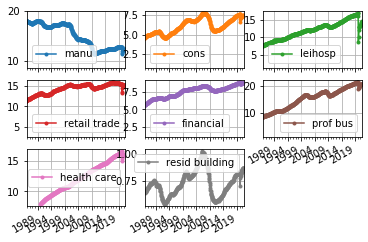

In [4]:
# employment level by sector plot 
plt.figure(1)
plt.clf()
d.plot(marker='.',subplots=True,grid='minor',layout=(3,3),
       xlim=(datetime.date(1985,1,1),datetime.date(2021,7,1)));

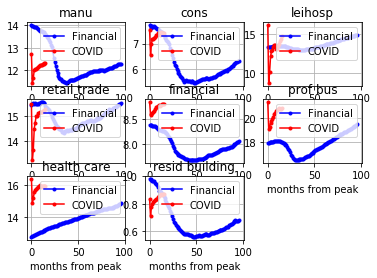

In [5]:
# employment level compared between 2008 and COVID
d08=d[(d.index>='2007-01-01') & (d.index<='2015-01-01')]
d20=d[d.index>='2020-03-01']
d08=d08.reset_index()
d20=d20.reset_index()
sector_names=list(d.columns)
plt.figure(2)
plt.clf()
for i,sec_name in enumerate(sector_names):
    
    fig=plt.subplot(3,3,i+1)
    plt.plot(d08.index,d08[sec_name],'b.-',label='Financial');
    plt.plot(d20.index,d20[sec_name],'r.-',label='COVID');
    plt.legend(loc='upper right')
    plt.grid('minor')
    plt.title(sec_name)
    plt.xlabel('months from peak')

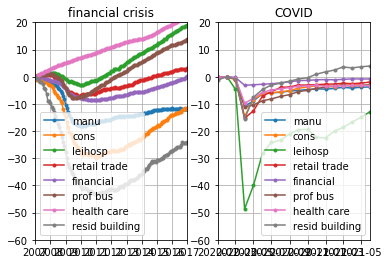

In [6]:
# employment % drop by sector
d2020=d[d.index=='2020-02-01']
d_covid_norm=(d.div(d2020.iloc[0])-1)*100
d2008=d[d.index=='2007-01-01']
d_financial_crisis_norm=(d.div(d2008.iloc[0])-1)*100

plt.figure(3)
plt.clf()
plt.subplot(1,2,1)
plt.plot(d_financial_crisis_norm,'.-')
plt.grid('minor')
plt.xlim(datetime.date(2007,1,1),datetime.date(2017,1,1))
plt.ylim(-60,20)
plt.title('financial crisis')
plt.legend(sector_names)

plt.subplot(1,2,2)
plt.plot(d_covid_norm,'.-')
plt.grid('minor')
plt.xlim(datetime.date(2020,1,1),datetime.date(2021,6,1))
plt.ylim(-60,20)
plt.title('COVID')
plt.legend(sector_names)